In [2]:
import numpy as np
import pandas as pd
import root_numpy as rn
import matplotlib.pyplot as plt

import matplotlib

matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.weight'] = 'bold'
matplotlib.rcParams['xtick.labelsize'] = 16
matplotlib.rcParams['ytick.labelsize'] = 16

%matplotlib inline

/Library/Python/2.7/site-packages/root_numpy/__init__.py:46: RuntimeWarning: numpy 1.12.1 is currently installed but you installed root_numpy against numpy 1.8.0rc1. Please consider reinstalling root_numpy for this numpy version.
  RuntimeWarning)


In [3]:
f = 'QUALITY_v2.root'

t = rn.root2array(f,treename='tree')
df0 = pd.DataFrame(t)
df = df0.query('mc_st_y > -990 & mc_st_x < 10000')

#print df.info()

In [4]:
def makePurPlots(var,xmin,xmax,nbins=50,xlabel='',gmin=0,gmax=0):
        
    mean = np.mean(df0[var].values)
    sigma = np.std(df0[var].values)
    
    plt.figure()
    _,_,_ = plt.hist(df0[var].values,bins=nbins,color='b',histtype='stepfilled',\
         alpha=0.6,range=(xmin,xmax))
    if var =='purity':
        plt.text(.13, 300, 'Ave Purity \n$\mu$ = %.2f' % \
                (mean),fontsize=16,bbox={'facecolor':'white','pad':10})
    if var =='complete':
        plt.text(.13, 1800, 'Ave Completeness \n$\mu$ = %.2f' % \
                (mean),fontsize=16,bbox={'facecolor':'white','pad':10})

        
    plt.yscale('log')
    plt.grid(True)
    plt.xlabel(xlabel,fontsize=16,weight='bold')
    plt.legend()
    plt.savefig('Plots/ShowerQuality_%s.png'%var, bbox_inches='tight')


/Library/Python/2.7/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


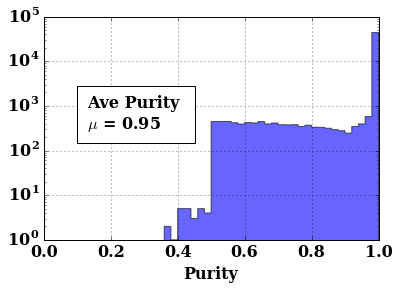

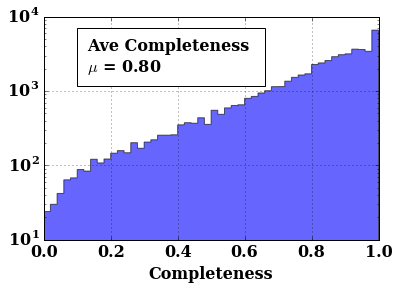

In [5]:
makePurPlots('purity',0,1,xlabel='Purity',gmin=0,gmax=1)
makePurPlots('complete',0,1,xlabel='Completeness',gmin=0,gmax=1)



In [6]:
#print df.info()

In [7]:
from scipy.optimize import curve_fit

def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))


In [8]:
def makePlots(var,xmin,xmax,nbins=50,xlabel='',gmin=0,gmax=0):
        
    mean = np.mean(df[var].values)
    sigma = np.std(df[var].values)
    
    plt.figure()
    _,_,_ = plt.hist(df[var].values,bins=nbins,color='b',histtype='stepfilled',\
         alpha=0.6,range=(xmin,xmax))
    if var.split('_')[0] == 'diff' :
        plt.text(4, 100, '$\mu$=%.2f \n$\sigma$=%.2f' % \
                (mean, sigma),fontsize=16,bbox={'facecolor':'white','pad':10})

    plt.yscale('log')
    plt.grid(True)
    plt.xlabel(xlabel,fontsize=16,weight='bold')
    plt.legend()
    plt.savefig('Plots/ShowerQuality_%s.png'%var, bbox_inches='tight')


In [9]:
FILE = '/Users/ah673/WorkArea/Root6LArLite/UserDev/FindNeutrinos/FindCutValue/mac/GRenergyres.root'
r = rn.root2array(FILE,treename='gamma_tree')
df_res = pd.DataFrame(r)

In [10]:
df_res.loc[:,'diff_e'] = df_res.loc[:,'_mc_low_e'] - df_res.loc[:,'_gamma_low_E']
df_res.loc[:,'eres'] = df_res.loc[:,'diff_e'] / df_res.loc[:,'_mc_low_e']

mc_e = np.concatenate((df_res['_mc_high_e'].values,df_res['_mc_low_e'].values),axis=0)
gamma_e = np.concatenate((df_res['_gamma_high_E'].values,df_res['_gamma_low_E'].values),axis=0)
eres = (mc_e - gamma_e )/mc_e

/Library/Python/2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in divide


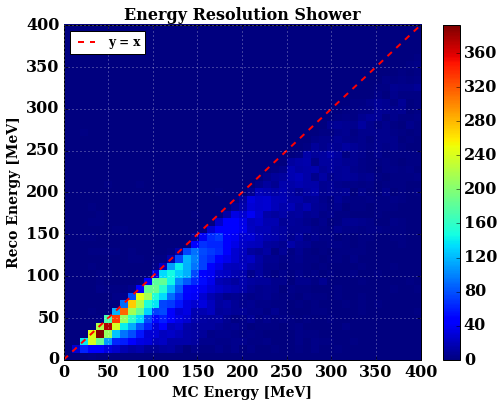

In [11]:
nbins = 45
x = np.linspace(0,400,50)

plt.figure(figsize=(8,6))
#plt.hist2d(df_res['_mc_high_e'].values,df_res['_gamma_high_E'].values,bins=nbins,range=[(0,400),(0,400)])
#plt.hist2d(df_res['_mc_low_e'].values,df_res['_gamma_low_E'].values,bins=nbins,range=[(0,400),(0,400)])
plt.hist2d(mc_e,gamma_e,bins=nbins,range=[(0,400),(0,400)])
plt.plot(x,x,lw=2,color='r',ls='--',label='y = x')
#plt.plot(x,0.77*x,lw=3,color='r',label='y = 0.77x')
plt.colorbar()
plt.legend(loc=0)
plt.grid(True,c='w')
plt.title('Energy Resolution Shower',fontsize=16,weight='bold')
plt.xlabel('MC Energy [MeV]',fontsize=14,weight='bold')
plt.ylabel('Reco Energy [MeV]',fontsize=14,weight='bold')
#plt.legend(loc='upper left',bbox_to_anchor=(1.0,0.5))
plt.savefig('Plots/ShowerQuality_eres2d.png')

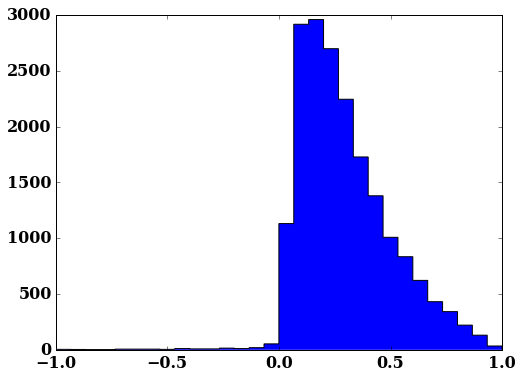

In [36]:
plt.figure(figsize=(8,6))
n_counts, bin_edges, _ = plt.hist(eres,bins=30,range=(-1.,1.),histtype='step',fill='b',edgecolor='k')
bins = (bin_edges[:-1] + bin_edges[1:])/2

In [38]:
# Calculate Gaussian distribution
coeff, _ = curve_fit(gauss, bins[14:-7], n_counts[14:-7], p0=([40.,0.2,0.5]))
print coeff

[  2.94478867e+03   2.20097459e-01   1.53312529e-01]


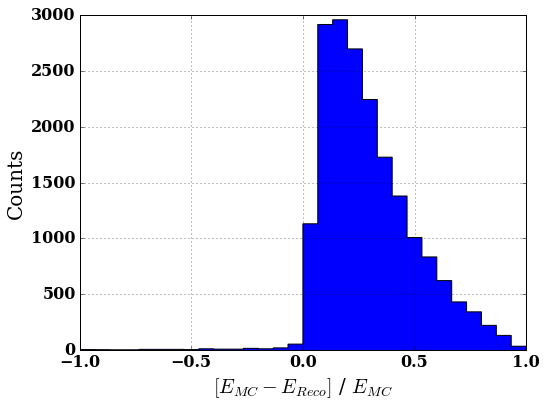

In [39]:
x_g = np.linspace(-1.,.47,80)

plt.figure(figsize=(8,6))
n_counts, bin_edges, _ = plt.hist(eres,bins=30,range=(-1.0,1.),histtype='step',fill='b',edgecolor='k')
#plt.plot(x_g, gauss(x_g,*coeff), 'r-',label='Gaussian Fit',lw=3)
#plt.text(-0.6, 80, '$\mu$=%.2f \n$\sigma$=%.2f' % \
#                (coeff[1], -1*coeff[2]),fontsize=20,bbox={'facecolor':'white','pad':10})
#plt.title("Fractional Energy Resolution of Matched Showers",fontsize=20)
plt.xlabel("$[E_{MC} - E_{Reco}]$ / $E_{MC}$",fontsize=20)
plt.ylabel("Counts",fontsize=20)
plt.grid(True)
plt.savefig("Plots/ShowerQuality_eres.png")

In [41]:
FILE = '/Users/ah673/WorkArea/Root6LArLite/UserDev/FindNeutrinos/MCC83_FinalPlots/GroupReview_v1.0/singlepi0cos_GRenergyres.root'
r = rn.root2array(FILE,treename='gamma_tree')
df_res = pd.DataFrame(r)

df_res = df_res.query('_mc_low_e != -999') # & _gamma_oangle > 0.35')

df_res.loc[:,'diff_e'] = df_res.loc[:,'_mc_low_e'] - df_res.loc[:,'_gamma_low_E']
df_res.loc[:,'eres'] = df_res.loc[:,'diff_e'] / df_res.loc[:,'_mc_low_e']

mc_e = np.concatenate((df_res['_mc_high_e'].values,df_res['_mc_low_e'].values),axis=0)
gamma_e = np.concatenate((df_res['_gamma_high_E'].values,df_res['_gamma_low_E'].values),axis=0)

eres = (mc_e - gamma_e) /mc_e

/Library/Python/2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in divide


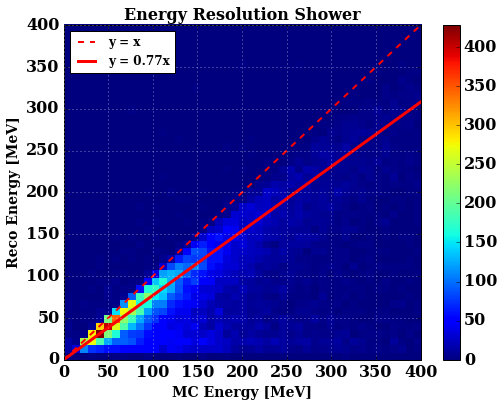

In [42]:
nbins = 45
x = np.linspace(0,400,50)

plt.figure(figsize=(8,6))
#plt.hist2d(df_res['_mc_low_e'].values,df_res['_gamma_low_E'].values,bins=nbins,range=[(0,400),(0,400)])
#plt.hist2d(df_res['_mc_high_e'].values,df_res['_gamma_high_E'].values,bins=nbins,range=[(0,400),(0,400)])

plt.hist2d(mc_e,gamma_e,bins=nbins,range=[(0,400),(0,400)])
plt.plot(x,x,lw=2,color='r',ls='--',label='y = x')
plt.plot(x,0.77*x,lw=3,color='r',label='y = 0.77x')
plt.colorbar()
plt.legend(loc=0)
plt.grid(True,c='w')
plt.title('Energy Resolution Shower',fontsize=16,weight='bold')
plt.xlabel('MC Energy [MeV]',fontsize=14,weight='bold')
plt.ylabel('Reco Energy [MeV]',fontsize=14,weight='bold')
#plt.legend(loc='upper left',bbox_to_anchor=(1.0,0.5))
plt.savefig('Plots/ShowerQuality_eres2d.png')

[  2.82039144e+03   2.38936906e-01   1.73795372e-01]


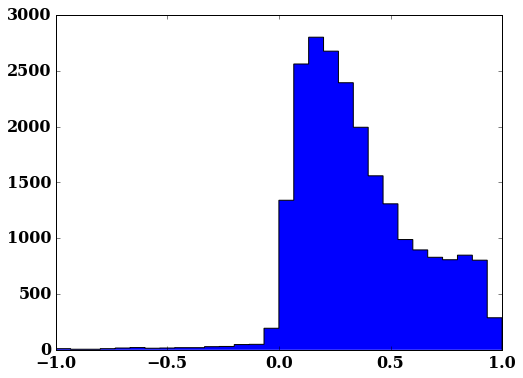

In [43]:
plt.figure(figsize=(8,6))
n_counts, bin_edges, _ = plt.hist(eres,bins=30,range=(-1.,1.),histtype='step',fill='b',edgecolor='k')
bins = (bin_edges[:-1] + bin_edges[1:])/2

# Calculate Gaussian distribution
coeff, _ = curve_fit(gauss, bins[14:-7], n_counts[14:-7], p0=([40.,0.2,0.5]))
print coeff

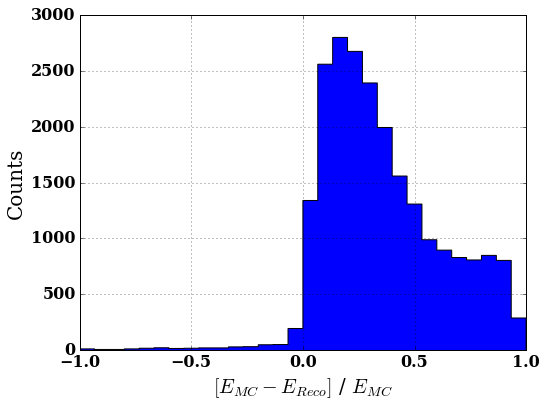

In [45]:
x_g = np.linspace(-1.,.47,80)

plt.figure(figsize=(8,6))
n_counts, bin_edges, _ = plt.hist(eres,bins=30,range=(-1.0,1.),histtype='step',fill='b',edgecolor='k')
#plt.plot(x_g, gauss(x_g,*coeff), 'r-',label='Gaussian Fit',lw=3)
#plt.text(-0.6, 80, '$\mu$=%.2f \n$\sigma$=%.2f' % \
#                (coeff[1], -1*coeff[2]),fontsize=20,bbox={'facecolor':'white','pad':10})
#plt.title("Fractional Energy Resolution of Matched Showers",fontsize=20)
plt.xlabel("$[E_{MC} - E_{Reco}]$ / $E_{MC}$",fontsize=20)
plt.ylabel("Counts",fontsize=20)
plt.grid(True)
plt.savefig("Plots/ShowerQuality_eres.png")

In [151]:
print #df_res._gamma_oangle.values

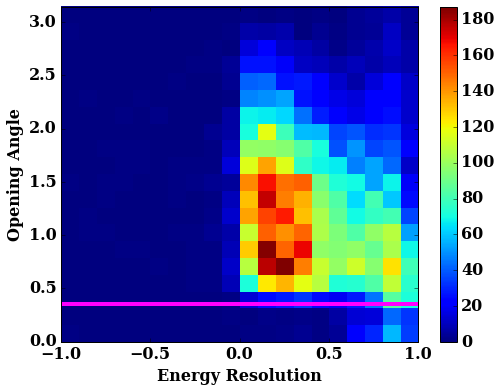

In [171]:
plt.figure(figsize=(8,6))
_ = plt.hist2d(df_res['eres'].values,df_res['_gamma_oangle'].values,bins=20,range=((-1,1),(0,3.14)))
plt.xlabel('Energy Resolution',fontsize=16,weight='bold')
plt.ylabel('Opening Angle',fontsize=16,weight='bold')
plt.axhline(0.35,lw=4,color='fuchsia')
plt.colorbar()

In [155]:
#print df_res._gamma_low_startx

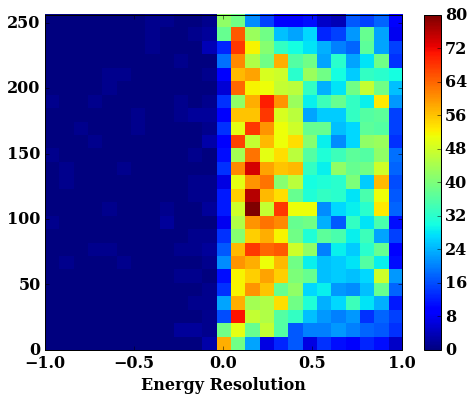

In [169]:
n = 25

plt.figure(figsize=(8,6))
_ = plt.hist2d(df_res['eres'].values,df_res['_gamma_low_startx'].values,bins=n,range=((-1,1),(0,256)))
#_ = plt.hist2d(df_res['eres'].values,df_res['_mc_low_starty'].values,bins=n,range=((-1,1),(-116,116)))
#_ = plt.hist2d(df_res['eres'].values,df_res['_mc_low_startz'].values,bins=n,range=((-1,1),(0,1040)))

plt.xlabel('Energy Resolution',fontsize=16,weight='bold')
#plt.ylabel('Opening Angle',fontsize=16,weight='bold')
#plt.axhline(25,lw=4,color='fuchsia')
plt.colorbar()

In [173]:
df_test = df_res.query('eres > 0.7')
print df_test.shape

j = 0
for i in df_test._event.values:
    
    print i, df_test.eres.values[j], df_test._mc_low_e.values[j], df_test._gamma_low_E.values[j]
    if i > 100 :
        break
        
    j += 1
#print df_test.info()

(2549, 59)
1 0.724077 143.861 39.6945
2 0.967984 379.53 12.1509
3 0.844349 106.902 16.6394
12 0.885166 112.099 12.8729
14 0.947071 215.945 11.4298
14 0.947071 215.945 11.4298
20 0.751653 208.79 51.8525
22 0.848952 115.326 17.4198
27 0.802103 87.1643 17.2496
52 0.773186 145.075 32.9049
67 0.894973 248.371 26.0856
67 0.916721 248.371 20.6841
72 0.75085 82.7022 20.6053
73 0.863531 110.075 15.0218
74 0.942158 184.662 10.6812
75 0.936501 226.233 14.3655
79 0.84261 90.5351 14.2494
90 0.747553 223.574 56.4406
90 0.747553 223.574 56.4406
94 0.916895 246.137 20.4551
102 0.878168 178.043 21.6913


In [73]:
df_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12156 entries, 0 to 12155
Data columns (total 59 columns):
_event                  12156 non-null int32
bkgd_id                 12156 non-null int32
_gamma_low_E            12156 non-null float32
_gamma_high_E           12156 non-null float32
_gamma_low_RL           12156 non-null float32
_gamma_high_RL          12156 non-null float32
_gamma_oangle           12156 non-null float32
_gamma_IP               12156 non-null float32
_gamma_low_matched      12156 non-null int8
_gamma_high_matched     12156 non-null int8
_gamma1_vtx_IP          12156 non-null float32
_gamma2_vtx_IP          12156 non-null float32
_pi0_mass               12156 non-null float32
_pi0_mom                12156 non-null float32
_event_type             12156 non-null int32
_nu_pdg                 12156 non-null int32
_isCC                   12156 non-null int8
_found_pi0              12156 non-null int8
_n_nu_origin_pi0        12156 non-null int32
_gamma_low_purity   